# Report (README)

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
tcolors = {
    k.replace('tab:', ''): v
    for k, v in mcolors.TABLEAU_COLORS.items()
}

tcolors.keys()

dict_keys(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

In [3]:
def plot_vs_ref(dat, ref):
    plt.figure(figsize=[10, 3])
    # train
    plt.plot(logs[dat]['epoch'], logs[dat]['dice_coef'],
         color=tcolors['blue'], linestyle='solid', label=dat)
    plt.plot(logs[ref]['epoch'], logs[ref]['dice_coef'],
         color=tcolors['blue'], linestyle='dashed', label=ref)
    # valid
    plt.plot(logs[dat]['epoch'], logs[dat]['val_dice_coef'],
         color=tcolors['orange'], linestyle='solid')
    plt.plot(logs[ref]['epoch'], logs[ref]['val_dice_coef'],
         color=tcolors['orange'], linestyle='dashed')
    # settings
    #plt.title(f'{dat} vs {ref}')
    plt.legend(loc='upper left', facecolor='white', framealpha=1.0)
    plt.ylim(0., 0.7)
    plt.grid(axis='y', color='lightgrey')

In [4]:
log_dir = Path('../notebooks-logs/')

In [5]:
list(log_dir.iterdir())

[PosixPath('../notebooks-logs/identify-contrails_2023-07-28_21-28-24_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-28_21-26-12_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-30_10-32-45_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-25_00-58-50_log.csv'),
 PosixPath('../notebooks-logs/submission.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-28_19-34-15_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-24_21-10-06_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-24_22-38-16_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-29_16-03-20_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-28_22-38-12_log.csv'),
 PosixPath('../notebooks-logs/identify-contrails_2023-07-29_21-28-43_log.csv')]

In [6]:
logs = {}
# DeepLabV3+ ResNet50
logs['deeplab_resnet50_ref'] = pd.read_csv(next(log_dir.glob('*07-24_22-38-16*')))
logs['deeplab_resnet50_lr002'] = pd.read_csv(next(log_dir.glob('*07-25_00-58-50*')))
logs['deeplab_resnet50_dropout'] = pd.read_csv(next(log_dir.glob('*07-30_10-32-45*')))
# DeepLabV3+ P3DResNet
logs['deeplab_p3dresnet_ref'] = pd.read_csv(next(log_dir.glob('*07-29_16-03-20*')))
logs['deeplab_p3dresnet_lr002'] = pd.read_csv(next(log_dir.glob('*07-28_21-26-12*')))  # v32
logs['deeplab_p3dresnet_gradacc'] = pd.read_csv(next(log_dir.glob('*07-28_21-28-24*')))  # v33
logs['deeplab_p3dresnet_gradacc-lr002'] = pd.read_csv(next(log_dir.glob('*07-28_22-38-12*')))
logs['deeplab_p3dresnet_dropout'] = pd.read_csv(next(log_dir.glob('*07-29_21-28-43*')))

In [7]:
logs['deeplab_p3dresnet_ref'].columns

Index(['epoch', 'dice_coef', 'loss', 'lr', 'val_dice_coef', 'val_loss'], dtype='object')

## DeepLabV3+/ResNet50

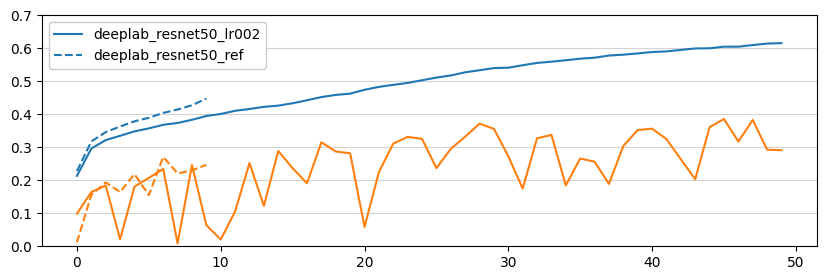

In [8]:
plot_vs_ref('deeplab_resnet50_lr002', 'deeplab_resnet50_ref')

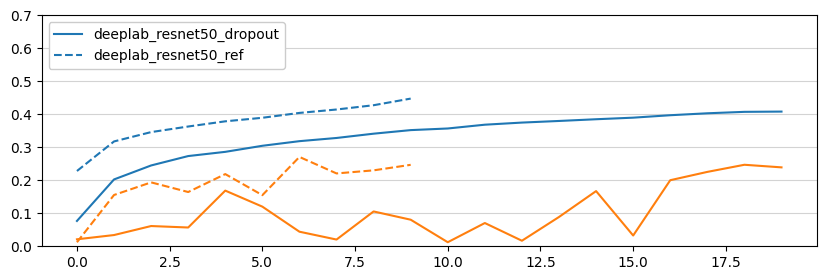

In [9]:
plot_vs_ref('deeplab_resnet50_dropout', 'deeplab_resnet50_ref')

## DeepLabV3+/P3DResNet

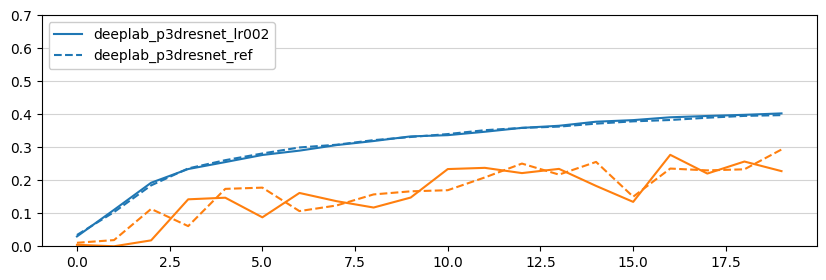

In [10]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_p3dresnet_ref')

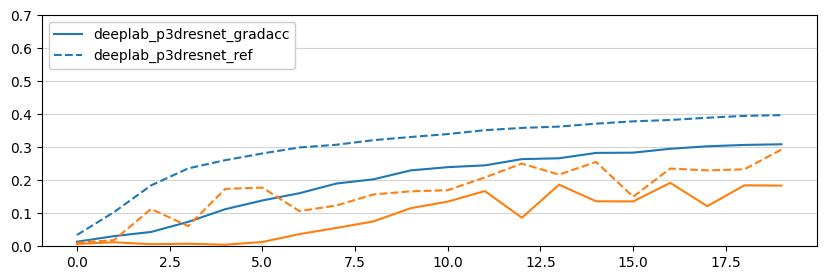

In [11]:
plot_vs_ref('deeplab_p3dresnet_gradacc', 'deeplab_p3dresnet_ref')

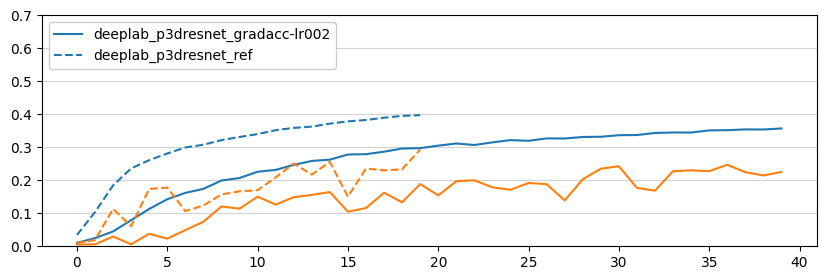

In [12]:
plot_vs_ref('deeplab_p3dresnet_gradacc-lr002', 'deeplab_p3dresnet_ref')

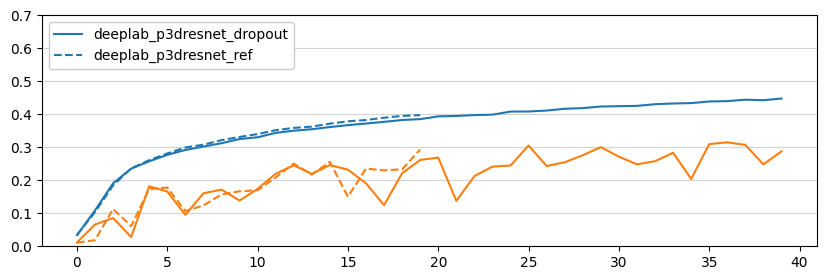

In [13]:
plot_vs_ref('deeplab_p3dresnet_dropout', 'deeplab_p3dresnet_ref')

## DeepLabV3+/P3DResNet vs ResNet50

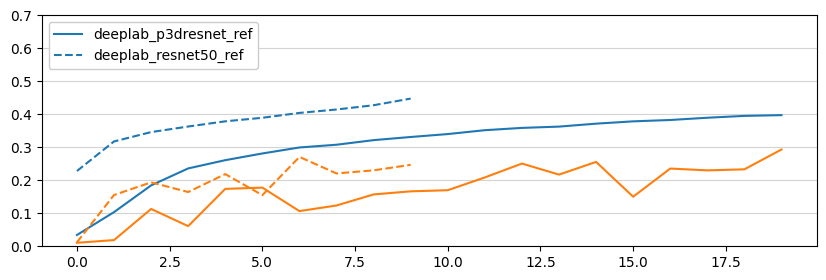

In [14]:
plot_vs_ref('deeplab_p3dresnet_ref', 'deeplab_resnet50_ref')

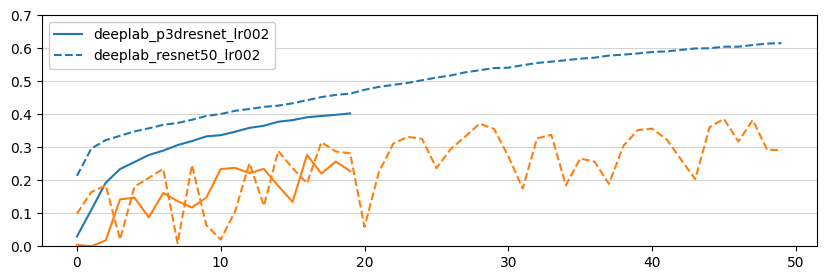

In [15]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002')